In [3]:
!pip install yfinance

  Using cached yfinance-0.2.48-py2.py3-none-any.whl.metadata (13 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.7-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.48-py2.py3-none-any.whl (101 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [5]:
import yfinance as yf
import pandas as pd

# Download data for BlackRock's stock and compare it with S&P 500 (as a benchmark)
symbols = ['BLK', '^GSPC']  # BlackRock (BLK) and S&P 500 (^GSPC)
data = yf.download(symbols, start='2010-01-01', end='2023-12-31')['Adj Close']

# Preview the data
print(data.head())

# Calculate daily returns
returns = data.pct_change().dropna()

# Save the dataset for future use
data.to_csv('blackrock_data.csv')

[*********************100%***********************]  2 of 2 completed

Ticker                            BLK        ^GSPC
Date                                              
2010-01-04 00:00:00+00:00  162.379730  1132.989990
2010-01-05 00:00:00+00:00  163.080780  1136.520020
2010-01-06 00:00:00+00:00  159.718521  1137.140015
2010-01-07 00:00:00+00:00  161.474503  1141.689941
2010-01-08 00:00:00+00:00  162.611145  1144.979980


In [6]:
# Descriptive statistics
summary = returns.describe()
print(summary)

Ticker          BLK        ^GSPC
count   3521.000000  3521.000000
mean       0.000608     0.000469
std        0.017669     0.011034
min       -0.136546    -0.119841
25%       -0.007965    -0.003884
50%        0.000696     0.000643
75%        0.009465     0.005693
max        0.135239     0.093828


In [7]:
!pip install seaborn

In [8]:
!pip install matplotlib

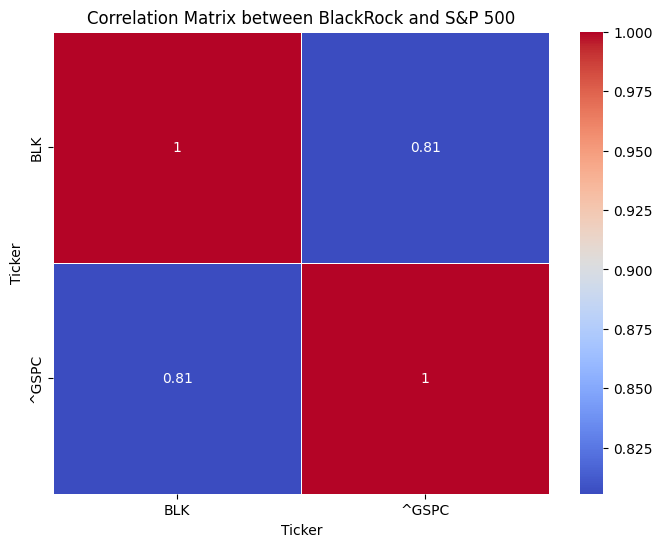

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between BlackRock and S&P 500
corr_matrix = returns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between BlackRock and S&P 500')
plt.show()

<Figure size 1000x600 with 0 Axes>

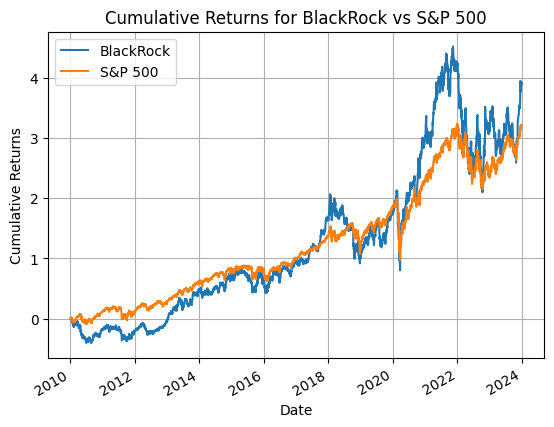

In [10]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns for BlackRock vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(['BlackRock', 'S&P 500'])
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

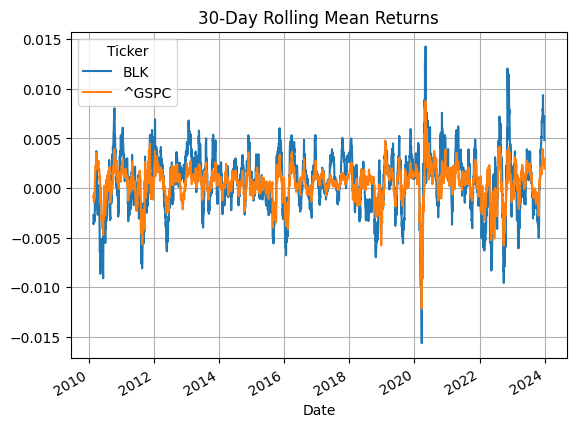

<Figure size 1000x600 with 0 Axes>

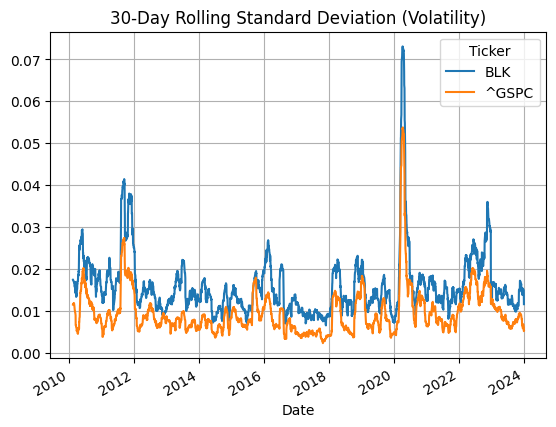

In [11]:
# Calculate rolling mean and volatility (standard deviation) for 30-day periods
rolling_mean = returns.rolling(window=30).mean()
rolling_std = returns.rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
rolling_mean.plot(title='30-Day Rolling Mean Returns')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
rolling_std.plot(title='30-Day Rolling Standard Deviation (Volatility)')
plt.grid(True)
plt.show()